In [3]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('talk')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

from matplotlib.ticker import MultipleLocator

In [41]:
labels = ['B-ResNet', 'B-DenseNet', 'MSDNet']
results = {
    'b-resnet' : pd.read_json('nuc_2_jetson_b-resnet_analysis2.json'),
    'b-densenet' : pd.read_json('nuc_2_jetson_b-densenet_analysis2.json'),
    'msdnet' : pd.read_json('msdnet-local3_analysis2.json')
}

methods = ['latest', 'confidence (add)', 'confidence (add,weighted)', 'confidence (max)', 'score-margin (max)', 
           'score_margin (add)' , 'score-margin (add,weighted)']

results['b-densenet']

,Delay Threshold,Exit,N,confidence (add),"confidence (add,weighted)",confidence (max),latest,missed,score-margin (max)
0,70.0,"[0.0, 0.0, 1.0, 0.0]",5000,0.0002,0.0002,0.0002,0.0002,4999,0.0002
1,72.5,"[3.0, 2.0, 41.0, 0.0]",5000,0.0068,0.0068,0.0070,0.0070,4954,0.0068
2,75.0,"[15.0, 17.0, 395.0, 0.0]",5000,0.0706,0.0712,0.0720,0.0724,4573,0.0704
3,77.5,"[40.0, 41.0, 1349.0, 0.0]",5000,0.2310,0.2322,0.2342,0.2350,3570,0.2266
4,80.0,"[33.0, 32.0, 2535.0, 0.0]",5000,0.4256,0.4286,0.4296,0.4316,2400,0.4168
...,...,...,...,...,...,...,...,...,...
88,290.0,"[0.0, 0.0, 0.0, 4991.0]",5000,0.8534,0.8566,0.8586,0.8644,9,0.8124
89,292.5,"[0.0, 0.0, 0.0, 4991.0]",5000,0.8534,0.8566,0.8586,0.8644,9,0.8124
90,295.0,"[0.0, 0.0, 0.0, 4991.0]",5000,0.8534,0.8566,0.8586,0.8644,9,0.8124
91,297.5,"[0.0, 0.0, 0.0, 4991.0]",5000,0.8534,0.8566,0.8586,0.8644,9,0.8124


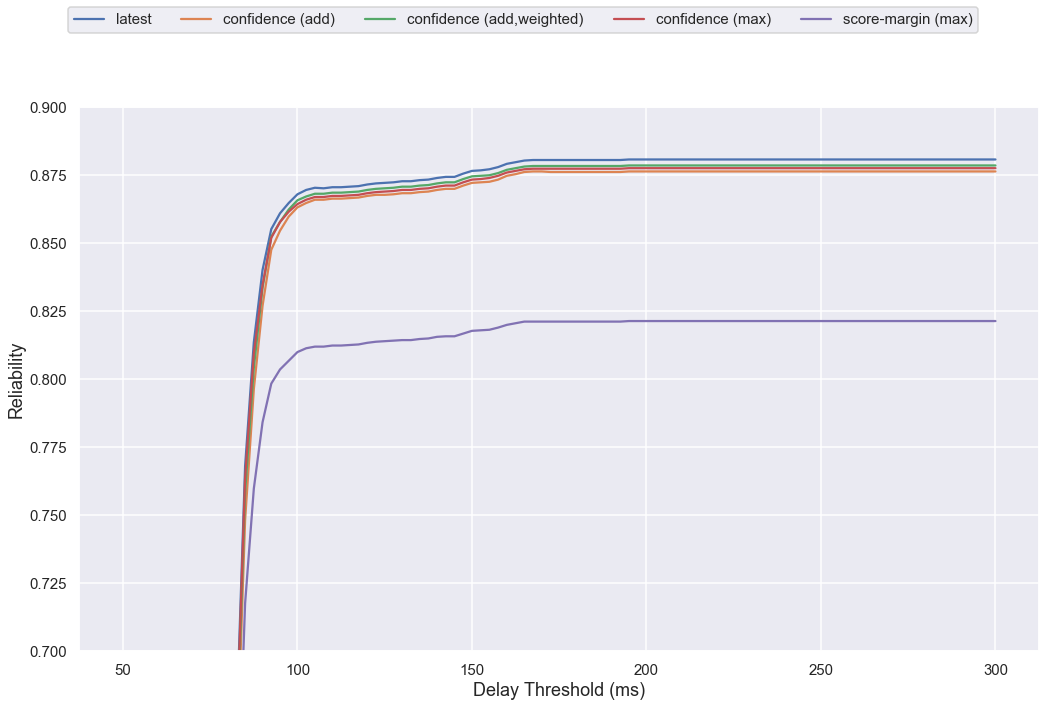

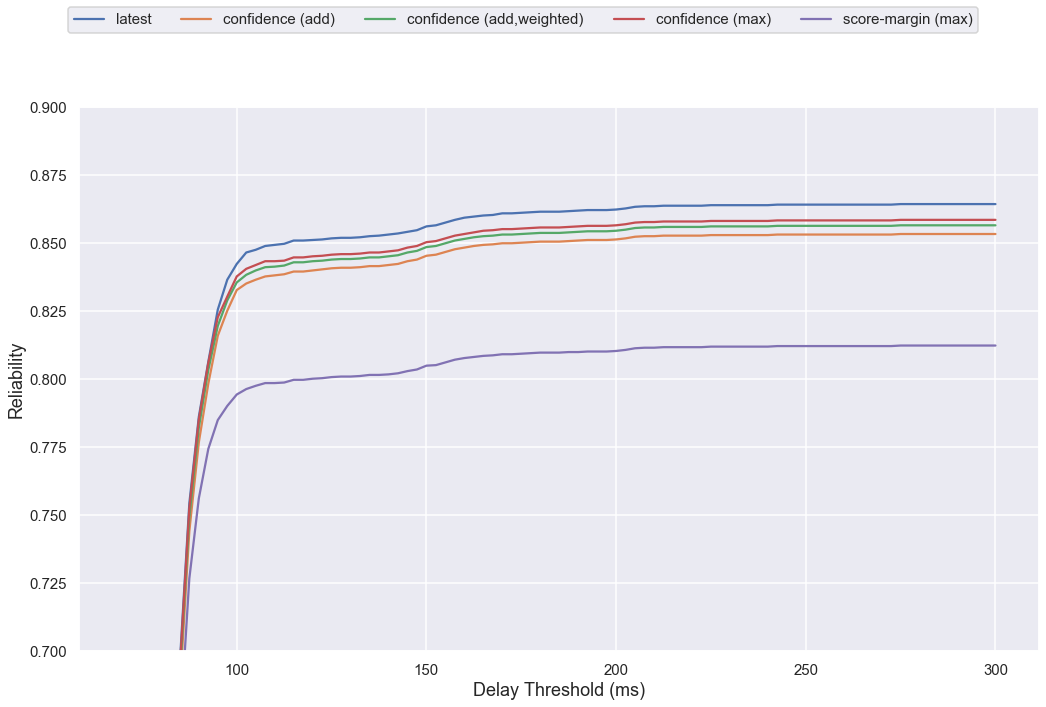

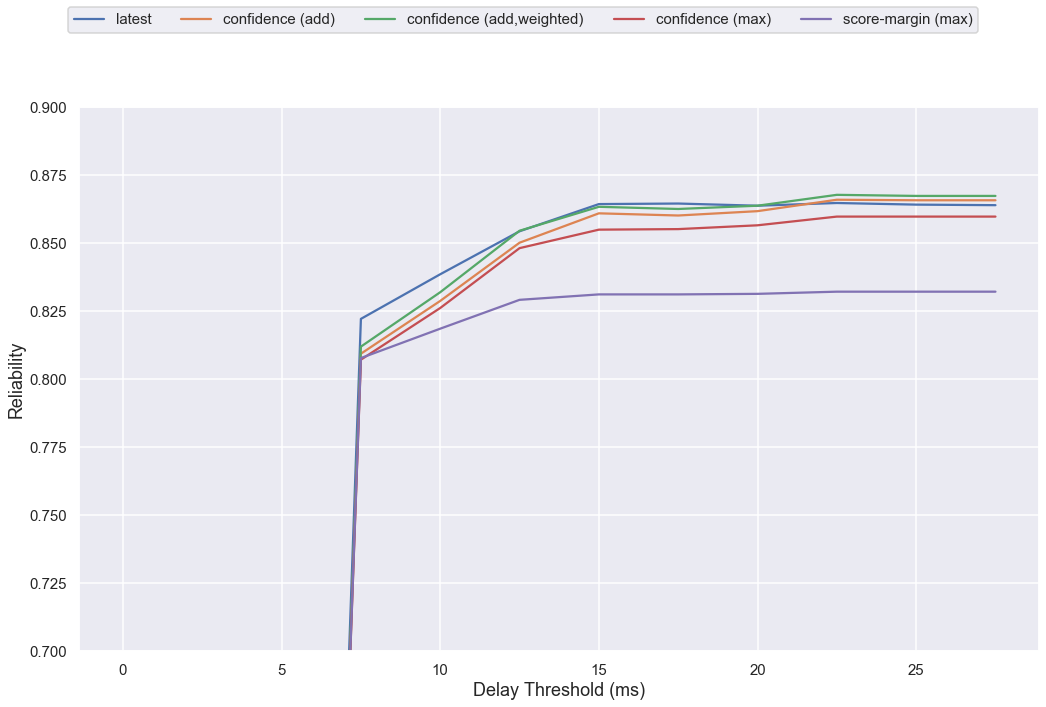

In [42]:
for net in results:
    fig, axes = plt.subplots(1,1, figsize=(16,10))
    for method in methods[:5]:
        axes.plot(results[net]['Delay Threshold'], results[net][method])
    axes.set_ylim([0.7,0.90])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Reliability')
    fig.legend(methods, ncol=5, 
               loc="upper center", fontsize='small')
    fig.tight_layout()
    fig.subplots_adjust(top=0.85, left=0.15)
    plt.savefig(net + '_information-combination.png')

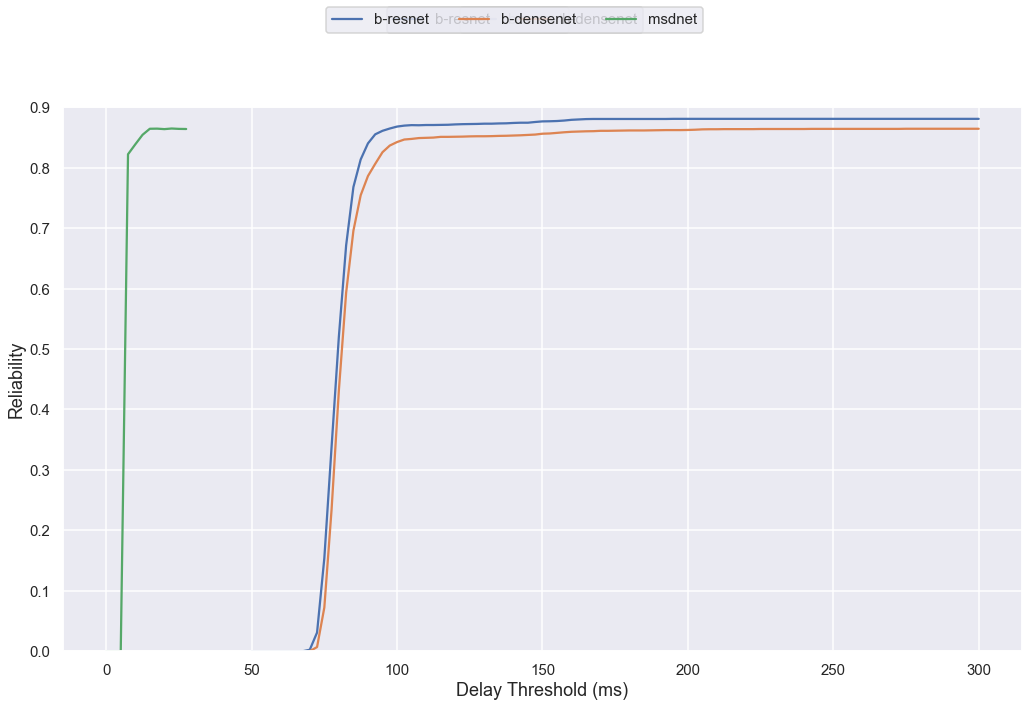

In [43]:
fig, axes = plt.subplots(1,1, figsize=(16,10))
for net in results:
    axes.plot(results[net]['Delay Threshold'], results[net]['latest'])
    axes.set_ylim([0.0,0.90])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Reliability')
    fig.legend(results, ncol=5, 
               loc="upper center", fontsize='small')
    fig.tight_layout()
    fig.subplots_adjust(top=0.85, left=0.15)
    plt.savefig(net + '_information-combination-comparison.png')

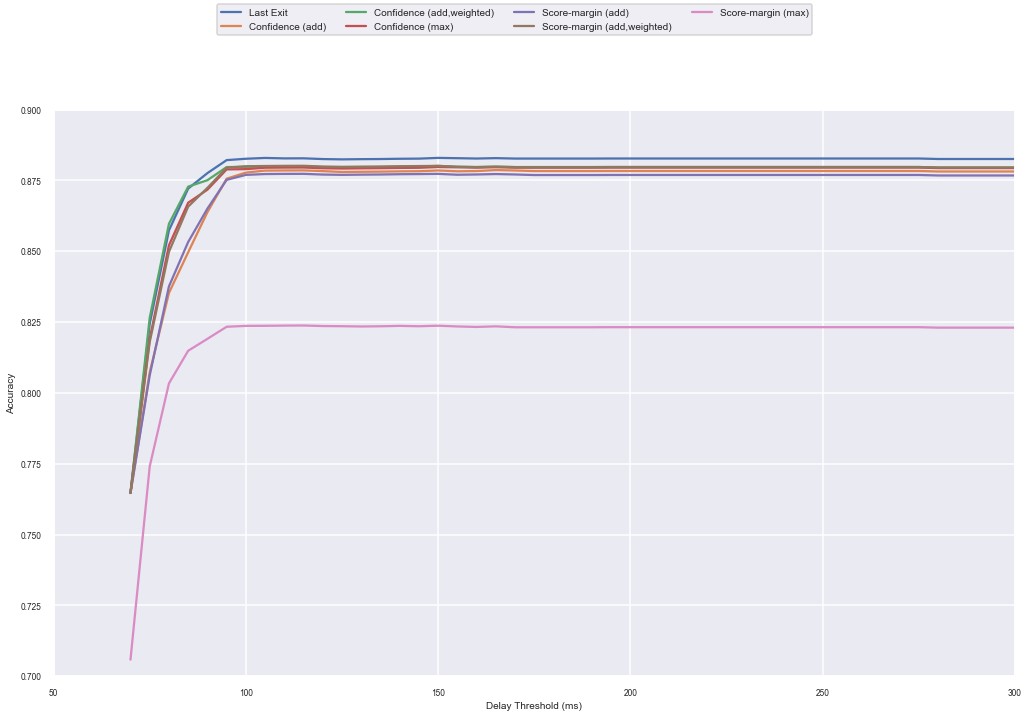

In [4]:
fig, axes = plt.subplots(1,1, figsize=(16,10))
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['latest'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['confidence (add)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['confidence (add,weighted)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['confidence (max)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['score_margin (add)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['score-margin (add,weighted)'])
axes.plot(results['b-resnet']['Delay Threshold'], results['b-resnet']['score-margin (max)'])
axes.set_xlim([50,300])
axes.set_ylim([0.70,0.90])
axes.set(xlabel='Delay Threshold (ms)', ylabel='Accuracy')
fig.legend(['Last Exit', 'Confidence (add)', 'Confidence (add,weighted)', 'Confidence (max)',
           'Score-margin (add)', 'Score-margin (add,weighted)', 'Score-margin (max)'], ncol=4, 
           loc="upper center", fontsize='medium')
fig.tight_layout()
fig.subplots_adjust(top=0.85, left=0.15)
plt.savefig('information-combination.png')

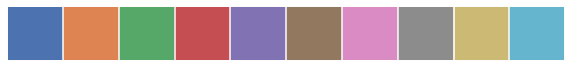

In [39]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

IndexError: too many indices for array

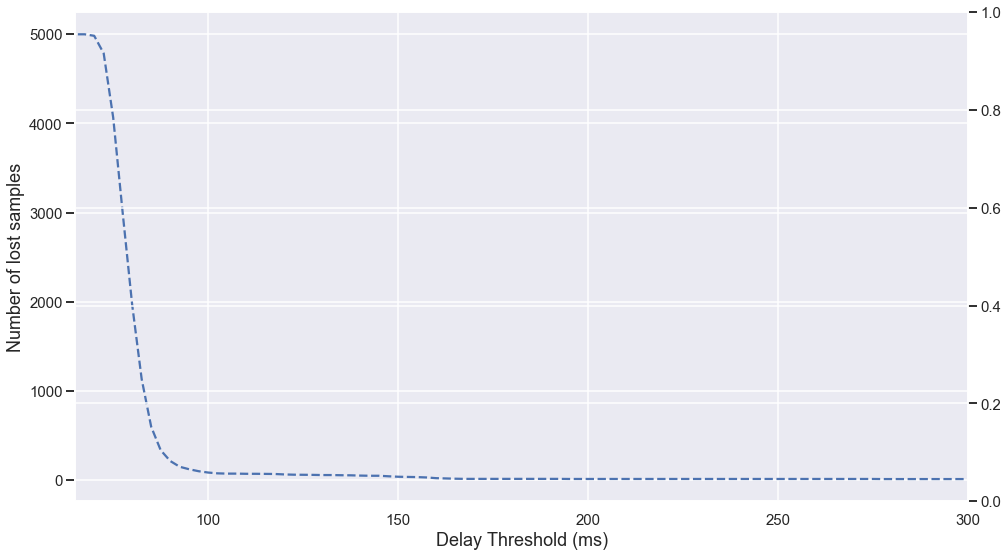

In [40]:
for net in results:
    fig, axes = plt.subplots(1,1)
    #print(results[net]['missed'])
    ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
    axes.plot(results[net]['Delay Threshold'], results[net]['missed'], '--')
    axes.set_xlim([65,300])
    #axes.set_ylim([-0.05,1.05])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Number of lost samples')

    
    results[net] = results[net].dropna()
    exits = np.array(results[net]['Exit'].tolist())
    ax2.plot(results[net]['Delay Threshold'], exits[:,0]/5000,  color=current_palette[1])
    ax2.plot(results[net]['Delay Threshold'], exits[:,1]/5000,  color=current_palette[2])
    ax2.plot(results[net]['Delay Threshold'], exits[:,2]/5000,  color=current_palette[3])
    ax2.plot(results[net]['Delay Threshold'], exits[:,3]/5000,  color=current_palette[4])


    ax2.set(ylabel='Arrived at exit frequency')


    fig.legend(['Lost Samples'] + ['exit-{}'.format(x) for x in range(4)], ncol=5, loc="upper center", fontsize='medium')
plt.savefig(net + '_exit-reached.png')

NameError: name 'current_palette' is not defined

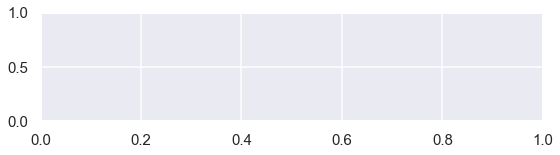

In [38]:
width=1
for net in results:
    exits = np.array(results[net]['Exit'].tolist())
    
    fig, axes = plt.subplots(1, sharex=True, figsize=(9,2))
    axes.bar(np.arange(len(results[net]['Delay Threshold'])), results[net]['missed']/5000,  color=current_palette[0], width=width)
    
    axes.set_xticks(np.arange(0,len(results[net]['Delay Threshold'])+5,10))
    axes.set_xticklabels(np.arange(0,301,60))
    
    for exit in range(4):
        fig, axes = plt.subplots(1, sharex=True, figsize=(9,2))

        width=1

        results[net] = results[net].dropna()

        axes.bar(np.arange(len(results[net]['Delay Threshold'])), exits[:,exit]/5000,  color=current_palette[exit+1], width=width)

        fig.tight_layout()


        
        axes.set_xticks(np.arange(0,len(results[net]['Delay Threshold'])+5,10))
        axes.set_xticklabels(np.arange(0,301,60))

        #fig.legend(['Lost'] + ['Exit.{}'.format(n) for n in range(4)], ncol=5, loc="upper center", fontsize='medium')

        fig.tight_layout()
        fig.subplots_adjust(top=0.90)

    

In [11]:
np.arange(0,len(results[net]['Delay Threshold'])+5,10)

array([ 0, 10, 20, 30, 40, 50])

In [12]:
np.arange(len(results[net]['Delay Threshold']))


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [13]:
np.array(results[net]['Delay Threshold'])

array([ 70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260,
       265, 270, 275, 280, 285, 290, 295, 300], dtype=int64)

In [14]:
np.array(results[net]['missed'])

array([4999., 4573., 2400.,  807.,  285.,  148.,  111.,  100.,   94.,
         88.,   86.,   83.,   82.,   79.,   75.,   68.,   57.,   48.,
         39.,   34.,   29.,   28.,   26.,   26.,   24.,   23.,   21.,
         16.,   14.,   13.,   13.,   12.,   12.,   12.,   11.,   10.,
         10.,   10.,   10.,   10.,   10.,    9.,    9.,    9.,    9.,
          9.,    9.])

In [21]:
lp = {
    'b-resnet' : pd.read_json('nuc_2_jetson_b-resnet_lost_prediction_analysis.json'),
    'b-densenet' : pd.read_json('nuc_2_jetson_b-densenet_lost_prediction_analysis.json'),
    'msdnet' : pd.read_json('msdnet-local3_lost_prediction_analysis.json')
}

In [22]:
lp['b-resnet']

,N Exits,confidence (add),"confidence (add,weighted)",confidence (max),latest,"score-margin (add,weighted)",score-margin (max),score_margin (add)
0,5000,0.4394,0.4394,0.4394,0.4394,0.4394,0.4394,0.4394
1,5000,0.6412,0.6594,0.6496,0.6684,0.6488,0.6374,0.6374
2,5000,0.8470,0.8726,0.8656,0.8698,0.8650,0.8158,0.8508
3,5000,0.8782,0.8796,0.8794,0.8826,0.8796,0.8232,0.8768


In [23]:
lp['msdnet']

,N Exits,latest,confidence (max),confidence (add),"confidence (add,weighted)",score-margin (max),score_margin (add),"score-margin (add,weighted)"
0,5000,0.7256,0.7256,0.7256,0.7256,0.7256,0.7256,0.7256
1,5000,0.8248,0.8100,0.8124,0.8150,0.8104,0.8104,0.8124
2,5000,0.8530,0.8432,0.8456,0.8502,0.8280,0.8452,0.8484
3,5000,0.8644,0.8550,0.8606,0.8630,0.8312,0.8588,0.8610
4,5000,0.8640,0.8598,0.8658,0.8674,0.8322,0.8646,0.8664


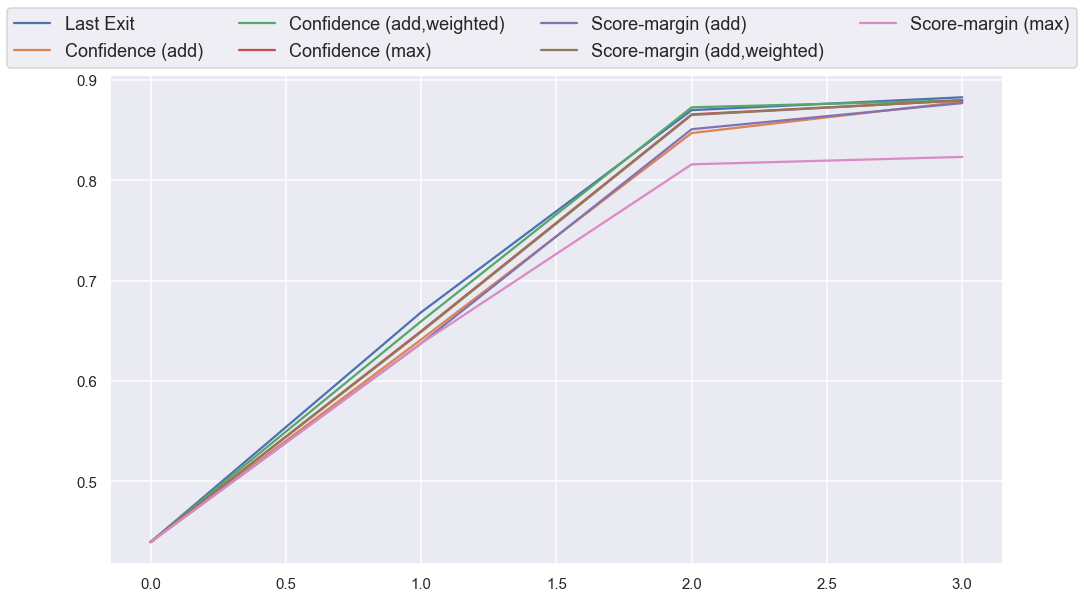

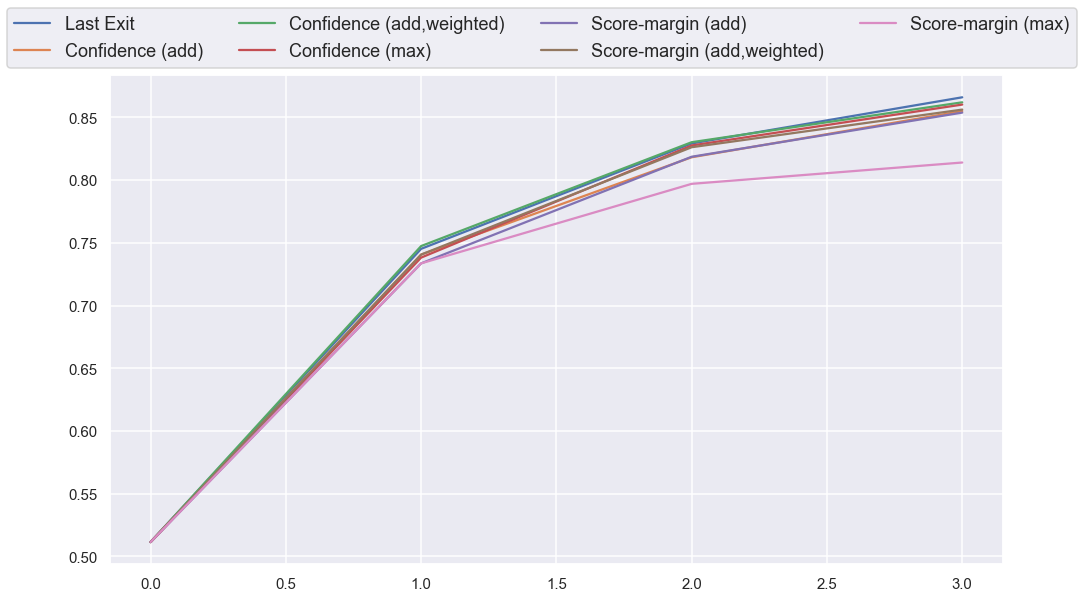

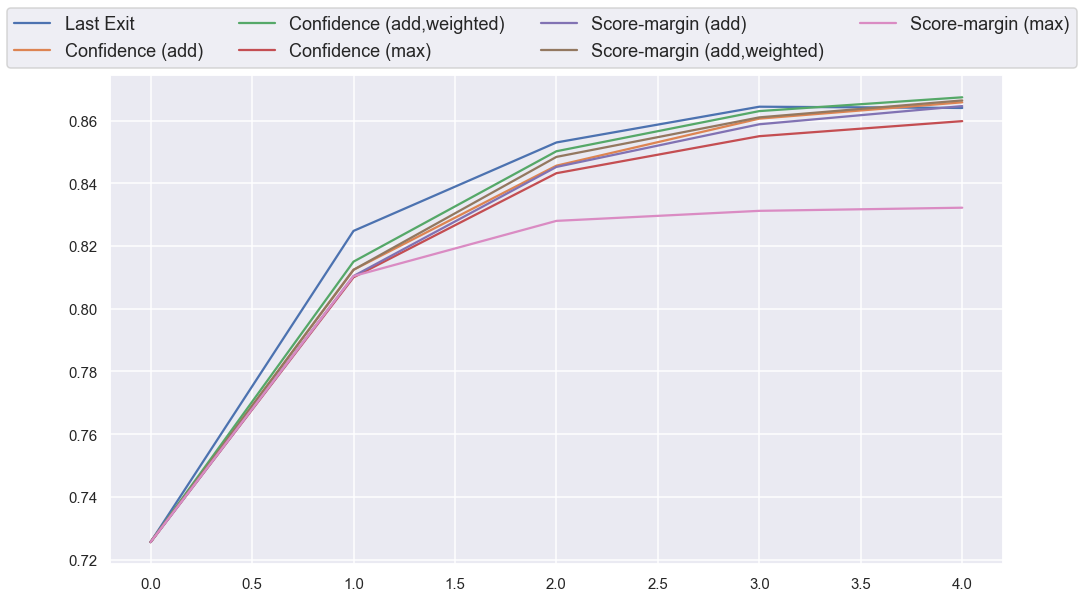

In [24]:
for net in lp:
    fig, axes = plt.subplots(1,1)
    for method in methods:
        axes.plot(lp[net][method])

    fig.legend(['Last Exit', 'Confidence (add)', 'Confidence (add,weighted)', 'Confidence (max)',
           'Score-margin (add)', 'Score-margin (add,weighted)', 'Score-margin (max)'], ncol=4, 
           loc="upper center", fontsize='medium')

KeyError: 'Delay Threshold'

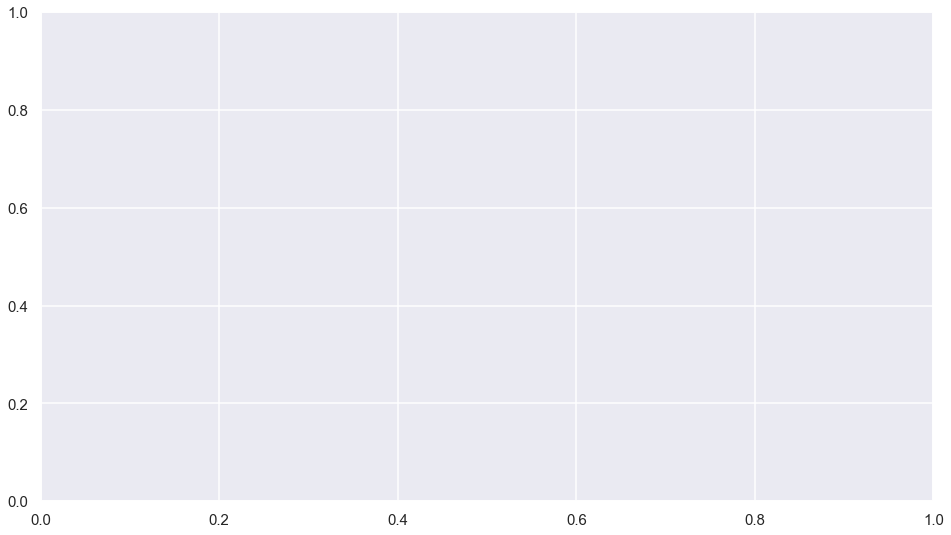

In [25]:
fig, axes = plt.subplots(1,1)

axes.bar(results['b-resnet']['Delay Threshold'], results['b-resnet']['missed'] / 5000, width=.2)
axes.set_xlim([65,300])
axes.set_ylim([-0.05,1.05])
axes.set(xlabel='Delay Threshold (ms)', ylabel='Missed prediction frequency')

ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
results['b-resnet'] = results['b-resnet'].dropna()
exits = np.array(results['b-resnet']['Exit'].tolist())
ax2.plot(results['b-resnet']['Delay Threshold'], exits[:,0]/5000,  color=current_palette[1])
ax2.plot(results['b-resnet']['Delay Threshold'], exits[:,1]/5000,  color=current_palette[2])
ax2.plot(results['b-resnet']['Delay Threshold'], exits[:,2]/5000,  color=current_palette[3])
ax2.plot(results['b-resnet']['Delay Threshold'], exits[:,3]/5000,  color=current_palette[4])


ax2.set(ylabel='Arrived at exit frequency')


fig.legend(['Lost Samples'] + ['exit-{}'.format(x) for x in range(4)], ncol=5, loc="upper center", fontsize='medium')
plt.savefig('exit-reached.png')

In [ ]:
results = {
    'b-resnet' : pd.read_json('../edge_test/nuc_2_jetson_b-resnet.json'),
    'b-densenet' : pd.read_json('../edge_test/nuc_2_jetson_b-densenet.json'),
    'msdnet' : pd.read_json('../edge_test/msdnet-local3.json')
}

In [26]:
top5  = { x : np.array(results[x].loc[(results[x]['index_top5'] != -1)].groupby('exit').count()['index_top5'].tolist()) / 5000 for x in results }
top5

{'b-resnet': array([0.738 , 0.8792, 0.9648, 0.9696]),
 'b-densenet': array([0.7862, 0.917 , 0.9452, 0.965 ]),
 'msdnet': array([0.9012, 0.9458, 0.9582, 0.963 , 0.9612])}

In [27]:
top1 = {x : np.array(results[x].loc[(results[x]['correct'] == True)].groupby('exit').count()['correct'].tolist()) / 5000 for x in results }
top1

{'b-resnet': array([0.4394, 0.6684, 0.8698, 0.8826]),
 'b-densenet': array([0.5114, 0.7452, 0.8292, 0.866 ]),
 'msdnet': array([0.7256, 0.8248, 0.853 , 0.8644, 0.864 ])}

In [28]:
combined_top5 = {}
for net in results:
    one_is_right = np.zeros(4)
    if net == 'msdnet':
        one_is_right = np.zeros(5)
    for _, d in results[net].groupby('sample'):
        idx = d.index_top5.tolist()
        for n in range(len(idx),0,-1):
            if all(i == -1 for i in idx[:n]):
                one_is_right[n-1] +=1 
    combined_top5[net] = (5000 - one_is_right) / 5000
combined_top5

{'b-resnet': array([0.738 , 0.8948, 0.9762, 0.9824]),
 'b-densenet': array([0.7862, 0.9344, 0.967 , 0.978 ]),
 'msdnet': array([0.9012, 0.9574, 0.9724, 0.978 , 0.9796])}

In [29]:
combined_top1 = {}
for net in results:
    one_is_right = np.zeros(4)
    if net == 'msdnet':
        one_is_right = np.zeros(5)
    for _, d in results[net].groupby('sample'):
        idx = d.index_top5.tolist()
        for n in range(len(idx),0,-1):
            if any(i==0 for i in idx[:n]):
                one_is_right[n-1] += 1
    combined_top1[net] = one_is_right / 5000
combined_top1

{'b-resnet': array([0.4394, 0.6962, 0.8968, 0.9152]),
 'b-densenet': array([0.5114, 0.7786, 0.8762, 0.9132]),
 'msdnet': array([0.7256, 0.8546, 0.8944, 0.9104, 0.9174])}

In [32]:
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox.expanded(1.05,1.4))

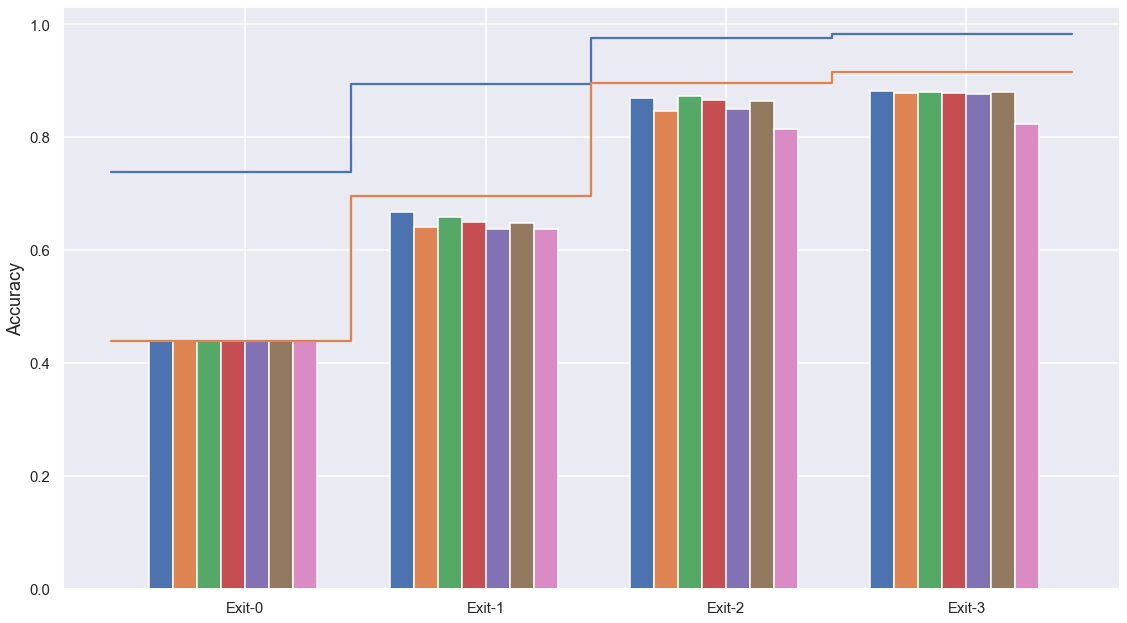

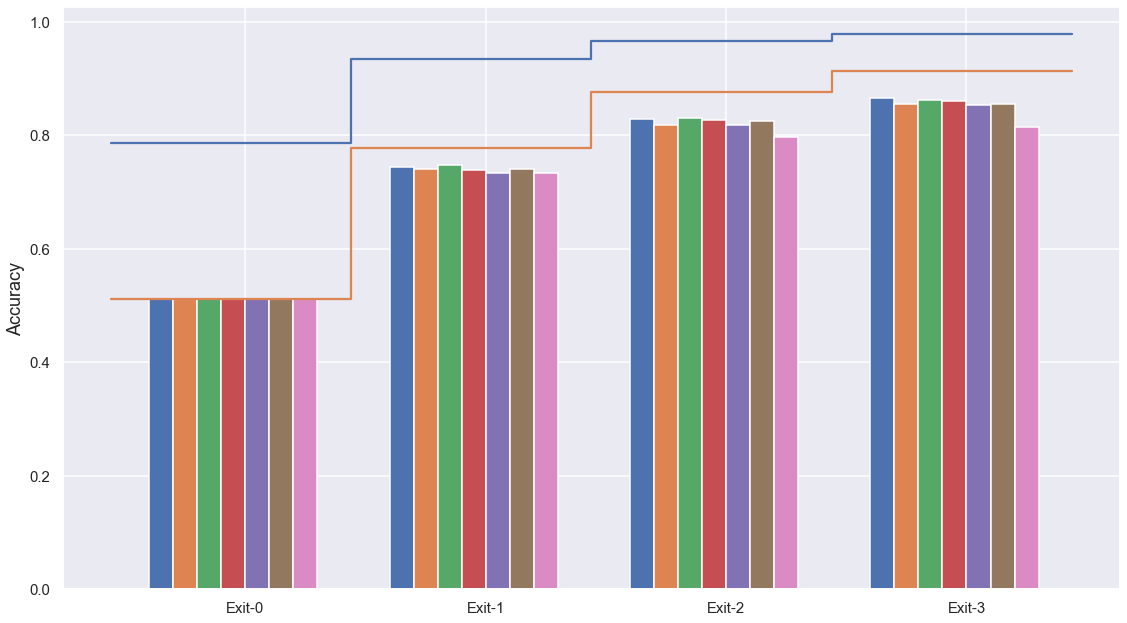

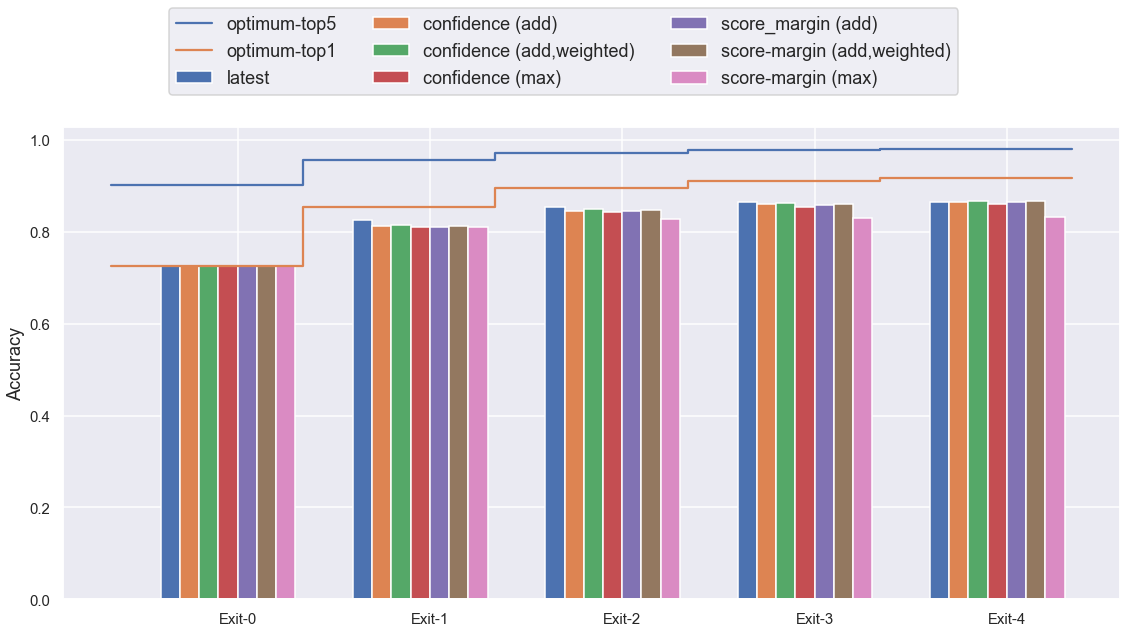

In [35]:
for net in lp:
    fig, axes = plt.subplots(1,1)
    n=4
    if net == 'msdnet':
        n = 5
    x = np.arange(n)
    axes.step(np.arange(n+1)-(n+1+width)*width,np.insert(combined_top5[net],0, combined_top5[net][0]))
    axes.step(np.arange(n+1)-(n+1+width)*width,np.insert(combined_top1[net],0, combined_top1[net][0]))
    width = 0.10  
    for index_offset, method in zip(np.arange(-3,4,1), methods):
        axes.bar(x+width*index_offset, lp[net][method], width=width)

    axes.set_xticks(x + width / 2)
    

    axes.set_xticklabels('Exit-{}'.format(i) for i in x)
    axes.set(ylabel='Accuracy')
    fig.tight_layout()
    
    plt.savefig(net + '_theoretical_score_combinations.png')
fig.subplots_adjust(top=0.8)
legend = fig.legend(['optimum-top5', 'optimum-top1']+methods, ncol=3, 
               loc="upper center", fontsize='medium')

export_legend(legend, filename='theoretical_score_combination_legend.png')